<a href="https://colab.research.google.com/github/NurulIlahiHusnah/Improving-Employee-Retention-by-Predicting-Employee-Attrition-Using-Machine-Learning/blob/master/Data_Preprocessing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Mengimport library yang aka digunakan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Mengupload data
data = pd.read_excel("/content/drive/MyDrive/Colab tugas 5 Mini Project/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx")
print()
print(data.dtypes)
print()
print(data.shape)
data.head(5)


Username                               object
EnterpriseID                            int64
StatusPernikahan                       object
JenisKelamin                           object
StatusKepegawaian                      object
Pekerjaan                              object
JenjangKarir                           object
PerformancePegawai                     object
AsalDaerah                             object
HiringPlatform                         object
SkorSurveyEngagement                    int64
SkorKepuasanPegawai                   float64
JumlahKeikutsertaanProjek             float64
JumlahKeterlambatanSebulanTerakhir    float64
JumlahKetidakhadiran                  float64
NomorHP                                object
Email                                  object
TingkatPendidikan                      object
PernahBekerja                          object
IkutProgramLOP                        float64
AlasanResign                           object
TanggalLahir                     

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


- Terdapat 287 baris dan 25 kolom,
- Terdapat beberapan type data yang kurang sesuai
- terdapat beberapa kolom yang memiliki missing value

In [11]:
# melihat jumlah missning value
data_missing = data.isnull().sum()
missing_value = data_missing [data_missing>0]
missing_value

SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
IkutProgramLOP                        258
AlasanResign                           66
dtype: int64

## Mengatasi data null

In [12]:
# melakukan drop pada kolom yang memiliki missing value diatas 10%
data = data.drop(columns=['IkutProgramLOP','AlasanResign'])

#melakukan imputasi pada kolom yang memiliki missing value dibawah 10%
median = data_missing.median()
data = data.fillna(median)

# melakukan pengecekan missing value
data.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

Setelah menghandle data yang missing terdapat kolom yang masih perlu diperhatikan. Untuk kolom tanggal yang memiliki type data object perlu di ubah ke type data date karena terdapat beberapa kolom yg memiliki missing value namun tidak terdetek ketika melakukan imputasi data sebelumnya dikarenakan type data object dimana ' - ' masih memiliki nilia, padahal ini tidak memiliki arti (kosong)

In [13]:
# merubah type data tanggal
data['TanggalLahir'] = pd.to_datetime(data['TanggalLahir'])
data['TanggalHiring'] = pd.to_datetime(data['TanggalHiring'])
data['TanggalPenilaianKaryawan'] = pd.to_datetime(data['TanggalPenilaianKaryawan'])
data['TanggalResign'] = pd.to_datetime(data['TanggalResign'], errors='coerce')


## Mengganti value yang tidak sesuai

In [14]:
print(data['PernahBekerja'].value_counts())
data['PernahBekerja'] = data['PernahBekerja'].replace('yes',0)
print(data['PernahBekerja'].value_counts())

1      286
yes      1
Name: PernahBekerja, dtype: int64
1    286
0      1
Name: PernahBekerja, dtype: int64


## Membuang data yang tidak diperlukan


In [15]:
data.nunique()

Username                              285
EnterpriseID                          287
StatusPernikahan                        5
JenisKelamin                            2
StatusKepegawaian                       3
Pekerjaan                              14
JenjangKarir                            3
PerformancePegawai                      5
AsalDaerah                              5
HiringPlatform                          9
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     6
JumlahKeikutsertaanProjek               9
JumlahKeterlambatanSebulanTerakhir      7
JumlahKetidakhadiran                   23
NomorHP                               287
Email                                 287
TingkatPendidikan                       3
PernahBekerja                           2
TanggalLahir                          284
TanggalHiring                          97
TanggalPenilaianKaryawan              127
TanggalResign                          52
dtype: int64

setelah melakukan pengecekan tidak terdapat data kolom yang memiliki 1 nilai uniq value

### Buatlah dua tabel agregat yang menghitung jumlah karyawan yang masuk dan keluar berdasarkan tahun hiring dan tahun resign


In [16]:
# melihat tanggal mulainya Hiring
awal = data['TanggalHiring'].min()
print('Tanggal Mulai Hiring: ',awal)

akhir =data['TanggalHiring'].max()
print('Tanggal Akhir Hiring: ',akhir)

Tanggal Mulai Hiring:  2006-01-09 00:00:00
Tanggal Akhir Hiring:  2018-07-09 00:00:00


In [17]:
# melihat tanggal mulainya Resign
awal = data['TanggalResign'].min()
print('Tanggal Mulai Resign: ',awal)

akhir =data['TanggalResign'].max()
print('Tanggal Akhir Resign: ',akhir)

Tanggal Mulai Resign:  2013-05-30 00:00:00
Tanggal Akhir Resign:  2020-09-27 00:00:00


In [18]:
# menampilan detail jumlah karyawan resign berdasatkan tanggal
print(data.groupby('TanggalResign').agg({'EnterpriseID' : 'count'}).head(5))

               EnterpriseID
TanggalResign              
2013-05-30                4
2013-09-26                1
2014-04-07                1
2014-08-19                9
2014-09-24                2


In [19]:
# menampilan detail jumlah karyawan Hiring berdasatkan tanggal
print(data.groupby('TanggalHiring').agg({'EnterpriseID' : 'count'}))

               EnterpriseID
TanggalHiring              
2006-01-09                1
2007-06-25                1
2007-11-05                1
2008-01-07                1
2008-10-27                1
...                     ...
2017-01-07                1
2017-02-10                1
2017-02-15                1
2017-04-20                2
2018-07-09                1

[97 rows x 1 columns]


In [20]:
# Menghitung jumlah karyawan yang masuk berdasarkan tahun hiring
jumlah_masuk = data.groupby(data['TanggalHiring'].dt.year)['EnterpriseID'].count()

# Menghitung jumlah karyawan yang keluar berdasarkan tahun resign
jumlah_keluar = data.groupby(data['TanggalResign'].dt.year)['EnterpriseID'].count()

# Menampilkan tabel agregat jumlah masuk
print("Tabel Agregat Jumlah Karyawan Masuk:")
print(jumlah_masuk)

# Menampilkan tabel agregat jumlah keluar
print("\nTabel Agregat Jumlah Karyawan Keluar:")
print(jumlah_keluar)

Tabel Agregat Jumlah Karyawan Masuk:
TanggalHiring
2006     1
2007     2
2008     2
2009     7
2010     8
2011    76
2012    41
2013    43
2014    56
2015    31
2016    14
2017     5
2018     1
Name: EnterpriseID, dtype: int64

Tabel Agregat Jumlah Karyawan Keluar:
TanggalResign
2013.0     5
2014.0    12
2015.0     8
2016.0     8
2017.0    19
2018.0    26
2019.0     5
2020.0     6
Name: EnterpriseID, dtype: int64


### Join dua tabel tersebut berdasarkan tahun resign dan hiring agar menjadi satu tabel utuh

In [21]:
data_gabung = jumlah_masuk.to_frame(name='Jumlah Masuk').join(jumlah_keluar.to_frame(name= 'Jumlah Keluar'), how='outer')
print(data_gabung)

        Jumlah Masuk  Jumlah Keluar
2006.0           1.0            NaN
2007.0           2.0            NaN
2008.0           2.0            NaN
2009.0           7.0            NaN
2010.0           8.0            NaN
2011.0          76.0            NaN
2012.0          41.0            NaN
2013.0          43.0            5.0
2014.0          56.0           12.0
2015.0          31.0            8.0
2016.0          14.0            8.0
2017.0           5.0           19.0
2018.0           1.0           26.0
2019.0           NaN            5.0
2020.0           NaN            6.0


### Lakukan imputation pada data tahun yang kosong sesuai urutan

In [22]:
data_gabung=data_gabung.fillna(0)

### Hitung total karyawan yang resign, yang masih bertahan, dan perubahannya pada setiap tahunnya dari tabel hasil join pada tahap dua (2)

In [23]:
data_gabung['Jumlah karyawan bertahan'] =data_gabung['Jumlah Masuk'] - data_gabung['Jumlah Keluar']
print(data_gabung)

        Jumlah Masuk  Jumlah Keluar  Jumlah karyawan bertahan
2006.0           1.0            0.0                       1.0
2007.0           2.0            0.0                       2.0
2008.0           2.0            0.0                       2.0
2009.0           7.0            0.0                       7.0
2010.0           8.0            0.0                       8.0
2011.0          76.0            0.0                      76.0
2012.0          41.0            0.0                      41.0
2013.0          43.0            5.0                      38.0
2014.0          56.0           12.0                      44.0
2015.0          31.0            8.0                      23.0
2016.0          14.0            8.0                       6.0
2017.0           5.0           19.0                     -14.0
2018.0           1.0           26.0                     -25.0
2019.0           0.0            5.0                      -5.0
2020.0           0.0            6.0                      -6.0


### Buatlah plot yang menunjukan perubahan kenaikan dan penurunan di setiap tahun yang ada

In [24]:
tahun = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
data_gabung = pd.DataFrame(data_gabung, index=tahun)
data_gabung.index.name ='Tahun'
data_gabung

,Jumlah Masuk,Jumlah Keluar,Jumlah karyawan bertahan
Tahun,,,
2006,1.0,0.0,1.0
2007,2.0,0.0,2.0
2008,2.0,0.0,2.0
2009,7.0,0.0,7.0
2010,8.0,0.0,8.0
2011,76.0,0.0,76.0
2012,41.0,0.0,41.0
2013,43.0,5.0,38.0
2014,56.0,12.0,44.0


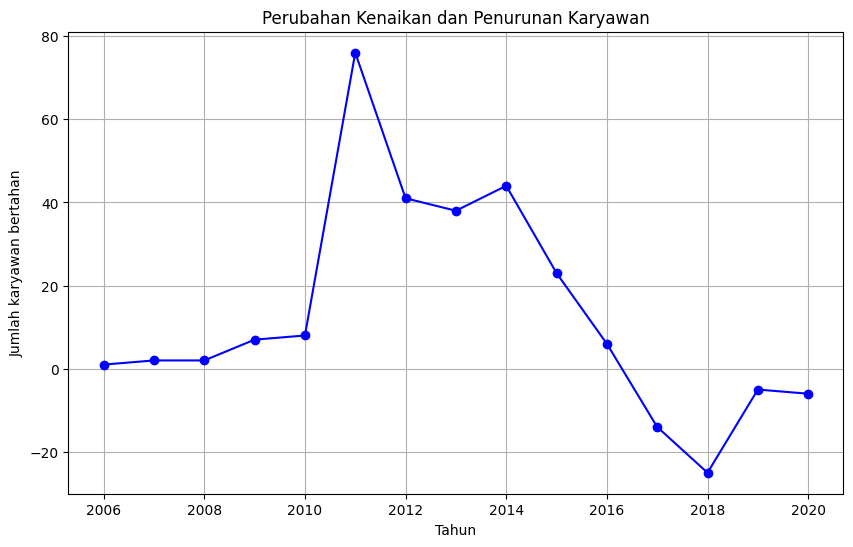

In [25]:

# Visualisasi Time Series menggunakan line chart
plt.figure(figsize=(10, 6))
plt.plot(data_gabung.index, data_gabung['Jumlah karyawan bertahan'], marker='o', linestyle='-', color='b')
plt.xlabel('Tahun')
plt.ylabel('Jumlah karyawan bertahan')
plt.title('Perubahan Kenaikan dan Penurunan Karyawan')
plt.grid(True)

# Menampilkan Grafik
plt.show()







In [26]:
# melakukan visualisasi menggunakan Waterfall
import plotly.graph_objects as go
fig2 = go.Figure(go.Waterfall(
name = 'EnterpriseID', orientation= "v",
x = ["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"],
textposition='auto',
text =['1','2','2','7','8','76','41','38','44','23','6','-14','-25','-5','-6'],
y = [1, 2, 2, 7, 8, 76, 4, 1, 38, 44, 23, 6, -14, -25, -5, -6],
connector ={"line":{"color":"#b20710"}},
increasing = {"marker":{"color":"#b20710"}},
decreasing = {"marker":{"color":"orange"}},
))

In [33]:
fig2.update_xaxes(showgrid=False)
fig2.update_yaxes(showgrid=False, visible=False)
fig2.update_traces(hovertemplate=None)
fig2.update_layout(title='Perubahan Kenaikan dan Penurunan Karyawan', height=350,
                   margin=dict(t=80, b=20, l=50, r=50),
                   hovermode="x unified",
                   xaxis_title=' ', yaxis_title=" ",
                   plot_bgcolor='#333', paper_bgcolor='#333',
                   title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                   font=dict(color='#8a8d93'))

In [34]:
!pip install waterfall_chart

ERROR: Could not find a version that satisfies the requirement waterfall_chart (from versions: none)
ERROR: No matching distribution found for waterfall_chart


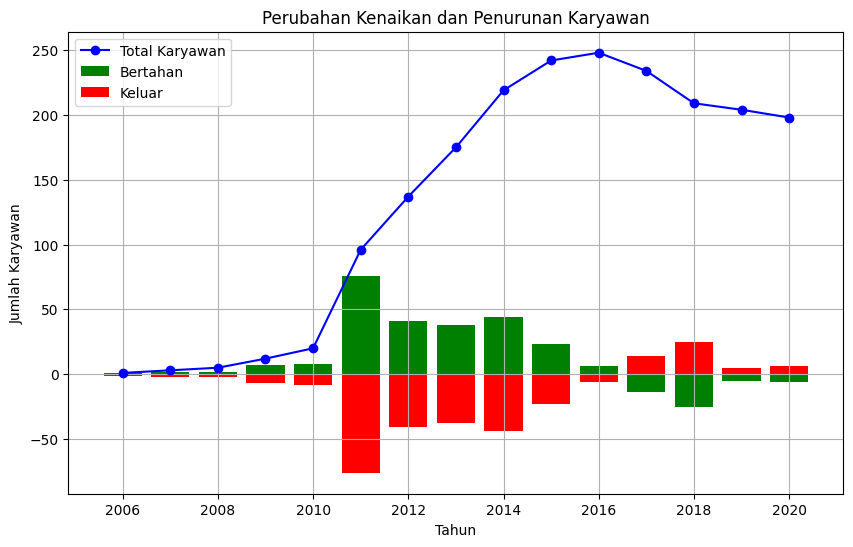

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
bertahan = [1, 2, 2, 7, 8, 76, 41, 38, 44, 23, 6, -14, -25, -5, -6]

# Calculate cumulative sum
cumulative = [sum(bertahan[:i+1]) for i in range(len(bertahan))]

# Create waterfall chart
plt.figure(figsize=(10, 6))
plt.bar(years, bertahan, color='g', label='Bertahan')
plt.bar(years, [-x for x in bertahan], color='r', label='Keluar')
plt.plot(years, cumulative, marker='o', linestyle='-', color='b', label='Total Karyawan')

plt.xlabel('Tahun')
plt.ylabel('Jumlah Karyawan')
plt.title('Perubahan Kenaikan dan Penurunan Karyawan')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
x = ["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
y = [1, 2, 2, 7, 8, 76, 4, 1, 38, 44, 23, 6, -14, -25, -5, -6]
waterfall.plot(x, y);

In [ ]:
# melakuka pengecekan ulang pada data yg memiliki missing value
#data_missing = data.isnull().sum()
#missing_value = data_missing [data_missing>0]
#missing_value

# melakukan drop pada kolom yang missing
#data =data.drop(columns='TanggalResign',axis=1)

#data.isnull().sum()